# Investigating the correlation between Foursquare venue data and voter participation in Catalonia's Parliamentary Elections in 2021, by electoral sections   - Data Collection

**Elitza Maneva**

In this Notebook we collect the data for the voter participatio study. First, we have to prepare the election data, which includes voter participation and geographic localization of the different electoral districts. Second, we need to get data about businesses near the election locations using Foursquare. 

## Preparing the election and geographic location data

The election data is available at the Open Data Portal of the Catalan Governement. We will load it an keep only the participation data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_elec = pd.read_csv("ElecParlCatalunya2021.csv")
df_elec.head()

,Codi circumscripció,Codi municipi,Nom municipi,Codi comarca,Nom comarca,Districte,Secció,Mesa,Cens electoral,Votants,...,Vots ESCONS EN BLANC (ESCAÑOS EN BLANCO) (EB),% ESCONS EN BLANC (ESCAÑOS EN BLANCO) (EB),Vots UNIDOS POR LA DEMOCRACIA + JUBILADOS (UNIDOS SI - DEf - PDSJE - SOMOS ESPAÑA),% UNIDOS POR LA DEMOCRACIA + JUBILADOS (UNIDOS SI - DEf - PDSJE - SOMOS ESPAÑA),Vots ALIANZA POR EL COMERCIO Y LA VIVIENDA (ALIANZA C V),% ALIANZA POR EL COMERCIO Y LA VIVIENDA (ALIANZA C V),Vots SUPORT CIVIL CATALÀ (SCAT),% SUPORT CIVIL CATALÀ (SCAT),Vots MOVIMENT CORRENT ROIG (M.C.R.),% MOVIMENT CORRENT ROIG (M.C.R.)
0,8,1,Abrera,11,Baix Llobregat,1,1,A,364,204,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,8,1,Abrera,11,Baix Llobregat,1,1,B,351,195,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,8,1,Abrera,11,Baix Llobregat,1,1,C,428,224,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,8,1,Abrera,11,Baix Llobregat,1,2,A,438,224,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,8,1,Abrera,11,Baix Llobregat,1,2,B,446,229,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


We'll keep only the columns we are interested in for our study of election participation.

In [3]:
df_elec = df_elec [['Nom municipi', 'Districte', 'Secció', 'Mesa', 'Cens electoral', 'Votants']]
df_elec

,Nom municipi,Districte,Secció,Mesa,Cens electoral,Votants
0,Abrera,1,1,A,364,204
1,Abrera,1,1,B,351,195
2,Abrera,1,1,C,428,224
3,Abrera,1,2,A,438,224
4,Abrera,1,2,B,446,229
...,...,...,...,...,...,...
9134,"Canonja, la",1,2,B,559,260
9135,"Canonja, la",1,3,A,447,230
9136,"Canonja, la",1,3,B,481,243
9137,"Canonja, la",1,4,A,587,254


In each electoral section there are several tables ("mesas" in Catalan) so we will sum over the different tables, and keep just the number of voters, and the electoral census per electoral section.  

In [4]:
df_elec_sec = df_elec.groupby(by = ['Nom municipi', 'Districte', 'Secció']).sum()
df_elec_sec.reset_index(level = ['Nom municipi', 'Districte', 'Secció'], inplace = True)
df_elec_sec

,Nom municipi,Districte,Secció,Cens electoral,Votants
0,Abella de la Conca,1,1,134,62
1,Abrera,1,1,1143,623
2,Abrera,1,2,1309,666
3,Abrera,1,3,615,387
4,Abrera,1,4,1421,830
...,...,...,...,...,...
5078,Xerta,1,1,917,521
5079,Àger,1,1,457,301
5080,Òdena,1,1,1771,1006
5081,Òdena,1,2,978,500


Let's see how many different municipalities there are in our table.

In [5]:
df_elec['Nom municipi'].unique().size

947

Let's see what is the total turn-out.

In [6]:
cens = df_elec["Cens electoral"].sum()
votants = df_elec["Votants"].sum()
print ("Census: ", cens)
print ("Voted: ", votants)
print ("Turn-out: ", votants/cens )

Census:  5368992
Voted:  2874610
Turn-out:  0.5354096262389663


We can get geolocation coordinates and surface area for all electoral sections. This data is from 2018 and is available from the website of the Catalan Institute for Cartography and Geology. The coordinates correspond to the centroids of the polygons corresponding to each section. 

In [7]:
df_geo_2018_areas = pd.read_csv("ElectoralSectionsAreas.csv")
df_geo_2018_areas

,MUNICIPI,DISTRICTE,SECCIO,MUNDISSEC,area,perimeter
0,80018,1,1,8001801001,9.138688e+05,4540.411884
1,80018,1,2,8001801002,1.268576e+05,1617.192289
2,80018,1,3,8001801003,2.567460e+06,10955.945543
3,80018,1,4,8001801004,6.637347e+06,15763.293331
4,80018,1,5,8001801005,1.012300e+05,1472.486084
...,...,...,...,...,...,...
5040,439060,1,2,43906001002,3.294851e+07,42535.034689
5041,439076,1,1,43907601001,6.456974e+05,3567.777812
5042,439076,1,2,43907601002,2.945703e+05,2484.863413
5043,439076,1,3,43907601003,1.990085e+06,9556.826238


We can also obtain the centroids of all sections from 2018. However because of a technical problem with converting the coordinates to latitude and longitude (I don't remember how to do it) we'll use those from 2016. Those are actually the ones that were used to query Foursquare.

In [76]:
df_geo_2016_centroids = pd.read_csv("Geospatial_Coordinates_Catalonia_2016.csv")
df_geo_2016_centroids

,MUNICIPI,DISTRICTE,SECCIO,MUNDISSEC,xcoord,ycoord
0,80018,1,1,8001801001,1.905579,41.510689
1,80018,1,2,8001801002,1.900865,41.520095
2,80018,1,3,8001801003,1.912979,41.513355
3,80018,1,4,8001801004,1.881557,41.514791
4,80018,1,5,8001801005,1.899702,41.517524
...,...,...,...,...,...,...
5588,170792,3,5,17079203005,2.815509,41.981490
5589,171997,1,7,17199701007,3.205423,42.073827
5590,171997,1,7,17199701007,3.196609,42.084584
5591,171997,1,7,17199701007,3.197619,42.084630


There are $5593$ rows in the centroids file, whereas the election data has $5041$ rows. Let's check the number of different electoral sections. 

In [77]:
df_geo_2016_centroids[["MUNDISSEC"]].value_counts()

MUNDISSEC  
17013901001    80
17032901001    76
17117502003    55
17140401001    33
17118104002    29
               ..
8101701012      1
8101701011      1
8101701010      1
8101701009      1
43907601004     1
Length: 5041, dtype: int64

The number of unique sections is $4$ more than that of the election data ($5041$). However, some sections have more than one set of coordinates. We inspected visually how similar these coordinates are, and they do seem to correspond to the same election area.

We will use the average of the coordinates for each section.

In [79]:
df_geo_2016_centroids = df_geo_2016_centroids.groupby(by = ['MUNDISSEC']).mean()
df_geo_2016_centroids.reset_index(level = ['MUNDISSEC'], inplace = True)
df_geo_2016_centroids.drop(['MUNICIPI', 'DISTRICTE', 'SECCIO'], axis=1, inplace=True)
df_geo_2016_centroids

,MUNDISSEC,xcoord,ycoord
0,8001801001,1.905579,41.510689
1,8001801002,1.900865,41.520095
2,8001801003,1.912979,41.513355
3,8001801004,1.881557,41.514791
4,8001801005,1.899702,41.517524
...,...,...,...
5036,43906001002,0.690514,40.813612
5037,43907601001,1.183560,41.125069
5038,43907601002,1.187117,41.118419
5039,43907601003,1.173061,41.127173


In [80]:
df_geo = pd.merge(left=df_geo_2016_centroids, right=df_geo_2018_areas, on = "MUNDISSEC", how = "left")
df_geo.drop(['perimeter'], axis=1, inplace=True)
df_geo

,MUNDISSEC,xcoord,ycoord,MUNICIPI,DISTRICTE,SECCIO,area
0,8001801001,1.905579,41.510689,80018,1,1,9.138688e+05
1,8001801002,1.900865,41.520095,80018,1,2,1.268576e+05
2,8001801003,1.912979,41.513355,80018,1,3,2.567460e+06
3,8001801004,1.881557,41.514791,80018,1,4,6.637347e+06
4,8001801005,1.899702,41.517524,80018,1,5,1.012300e+05
...,...,...,...,...,...,...,...
5036,43906001002,0.690514,40.813612,439060,1,2,3.294851e+07
5037,43907601001,1.183560,41.125069,439076,1,1,6.456974e+05
5038,43907601002,1.187117,41.118419,439076,1,2,2.945703e+05
5039,43907601003,1.173061,41.127173,439076,1,3,1.990085e+06


Let's check how many municipalities there are in the geo location table. (The election table had $947$ distinct municipalities.) 

In [81]:
df_geo["MUNICIPI"].unique().size

945

This seems close enough. Perhaps two municipalities got split into two in the period between 2018 and 2021. 

The elections table uses the names of the municipalities, whereas the geo localization table uses a code for each municipality. Next we need a table that connects the Municipality's names with their codes. This is available on Wikipedia.

We will also keep the population denity of each municipality, as it might be useful later on.

In [11]:
url_LLD = "https://ca.wikipedia.org/wiki/Llista_de_municipis_de_la_prov%C3%ADncia_de_Lleida"
url_GIR = "https://ca.wikipedia.org/wiki/Llista_de_municipis_de_la_prov%C3%ADncia_de_Girona"
url_TAR = "https://ca.wikipedia.org/wiki/Llista_de_municipis_de_la_prov%C3%ADncia_de_Tarragona"
url_BCN = "https://ca.wikipedia.org/wiki/Llista_de_municipis_de_la_prov%C3%ADncia_de_Barcelona"

dfs = pd.read_html(url_LLD, thousands = '.', decimal = ',')
df_muni_LLD = dfs[0]
df_muni_LLD = df_muni_LLD [['Municipi', 'Densitat', 'Coditerritorial']]
df_muni_LLD

,Municipi,Densitat,Coditerritorial
0,Abella de la Conca,2.34,250019
1,Agramunt,67.89,250030
2,Aitona,38.37,250387
3,Albatàrrec,212.95,250077
4,Albesa,41.52,250083
...,...,...,...
226,les Borges Blanques,100.37,250582
227,les Oluges,9.05,251522
228,les Valls d'Aguilar,1.98,259062
229,les Valls de Valira,4.58,252398


In [12]:
dfs = pd.read_html(url_GIR, thousands = '.', decimal = ',')
df_muni_GIR = dfs[0]
df_muni_GIR = df_muni_GIR [['Municipi', 'Densitat', 'Coditerritorial']]
df_muni_GIR

,Municipi,Densitat,Coditerritorial
0,Agullana,31.16,170010
1,Aiguaviva,55.04,170025
2,Albanyà,1.64,170031
3,Albons,68.38,170046
4,Alp,35.96,170062
...,...,...,...
216,la Vall d'en Bas,34.10,172076
217,la Vall de Bianya,13.62,172082
218,les Llosses,1.86,170963
219,les Planes d'Hostoles,45.65,171334


In the case of the table for the province of Tarragona, we noticed that it is missing its biggest municipality, the one named Tarragona, so we add it manually to the end of the table. 

In [13]:
dfs = pd.read_html(url_TAR, thousands = '.', decimal = ',')
df_muni_TAR = dfs[0]
df_muni_TAR = df_muni_TAR [['Municipi', 'Densitat', 'Coditerritorial']]
df_muni_TAR = df_muni_TAR.append({"Municipi": "Tarragona", "Densitat" :136496/57.88, "Coditerritorial": 431482}, ignore_index =True)
df_muni_TAR

,Municipi,Densitat,Coditerritorial
0,Aiguamúrcia,12.740000,430017
1,Albinyana,127.220000,430022
2,Alcanar,200.300000,430043
3,Alcover,111.830000,430056
4,Aldover,44.800000,430069
...,...,...,...
179,la Vilella Alta,25.580000,431732
180,la Vilella Baixa,36.430000,431747
181,les Borges del Camp,250.730000,430311
182,les Piles,9.380000,431055


In [14]:
dfs = pd.read_html(url_BCN, thousands = '.', decimal = ',')
df_muni_BCN = dfs[0]
df_muni_BCN = df_muni_BCN [['Municipi', 'Densitat', 'Coditerritorial']]
df_muni_BCN

,Municipi,Densitat,Coditerritorial
0,Abrera,630.05,80018
1,Aguilar de Segarra,6.51,80023
2,Aiguafreda,317.97,80142
3,Alella,1031.67,80039
4,Alpens,18.91,80044
...,...,...,...
306,les Franqueses del Vallès,699.79,80863
307,les Masies de Roda,43.84,81167
308,les Masies de Voltregà,139.82,81173
309,Òdena,69.60,81430


Let's concatenate the 4 tables.

In [15]:
df_muni = pd.concat([df_muni_BCN, df_muni_LLD, df_muni_GIR, df_muni_TAR])
df_muni

,Municipi,Densitat,Coditerritorial
0,Abrera,630.050000,80018
1,Aguilar de Segarra,6.510000,80023
2,Aiguafreda,317.970000,80142
3,Alella,1031.670000,80039
4,Alpens,18.910000,80044
...,...,...,...
179,la Vilella Alta,25.580000,431732
180,la Vilella Baixa,36.430000,431747
181,les Borges del Camp,250.730000,430311
182,les Piles,9.380000,431055


It looks like we have name and code for $947$ municipalities. Let's check that they are all different.

In [16]:
df_muni['Municipi'].unique().size

947

We rename the columns of this table so that we can join it first with the geo location table, and then with the elections data table.

In [17]:
df_muni.rename(columns = {'Coditerritorial': "MUNICIPI", 'Municipi' : "Nom municipi"}, inplace =True)
df_muni.head()

,Nom municipi,Densitat,MUNICIPI
0,Abrera,630.05,80018
1,Aguilar de Segarra,6.51,80023
2,Aiguafreda,317.97,80142
3,Alella,1031.67,80039
4,Alpens,18.91,80044


We keep this data in a file, so that we don't have to scrape it from Wikipedia on future runs.

In [50]:
df_muni.to_csv("df_muni.csv", index=False)

In [82]:
df_muni = pd.read_csv("df_muni.csv")

We merge the geo location table with the table of municiaplities scraped from Wikipedia.

In [83]:
df_coord = pd.merge(left=df_geo, right=df_muni, on = "MUNICIPI", how = "left")
df_coord

,MUNDISSEC,xcoord,ycoord,MUNICIPI,DISTRICTE,SECCIO,area,Nom municipi,Densitat
0,8001801001,1.905579,41.510689,80018,1,1,9.138688e+05,Abrera,630.05
1,8001801002,1.900865,41.520095,80018,1,2,1.268576e+05,Abrera,630.05
2,8001801003,1.912979,41.513355,80018,1,3,2.567460e+06,Abrera,630.05
3,8001801004,1.881557,41.514791,80018,1,4,6.637347e+06,Abrera,630.05
4,8001801005,1.899702,41.517524,80018,1,5,1.012300e+05,Abrera,630.05
...,...,...,...,...,...,...,...,...,...
5036,43906001002,0.690514,40.813612,439060,1,2,3.294851e+07,l'Ampolla,92.05
5037,43907601001,1.183560,41.125069,439076,1,1,6.456974e+05,la Canonja,815.89
5038,43907601002,1.187117,41.118419,439076,1,2,2.945703e+05,la Canonja,815.89
5039,43907601003,1.173061,41.127173,439076,1,3,1.990085e+06,la Canonja,815.89


In order to join this table with the election data we have to change the column names. We will also put the names of the municipalities in capital letters.

In [84]:
df_coord.rename(columns = {"DISTRICTE": "Districte", 'SECCIO': "Secció"}, inplace =True)
df_coord['Nom municipi'] = df_coord['Nom municipi'].apply(lambda nom: nom.upper())
df_coord.head()

,MUNDISSEC,xcoord,ycoord,MUNICIPI,Districte,Secció,area,Nom municipi,Densitat
0,8001801001,1.905579,41.510689,80018,1,1,9.138688e+05,ABRERA,630.05
1,8001801002,1.900865,41.520095,80018,1,2,1.268576e+05,ABRERA,630.05
2,8001801003,1.912979,41.513355,80018,1,3,2.567460e+06,ABRERA,630.05
3,8001801004,1.881557,41.514791,80018,1,4,6.637347e+06,ABRERA,630.05
4,8001801005,1.899702,41.517524,80018,1,5,1.012300e+05,ABRERA,630.05


We notice that the format of the names of the municipalities is slightly different. In the election data file the articles in front of the names ("l' ", "la", "les", "el", "els") are included after the name and separated from it with a comma.

Let's define a function for moving the articles at the front of the name.

In [85]:
def move_article_to_front (name): 
   parts = name.split(", ")
   if (len(parts) > 1):
       if (parts[1][-1] =="'"):
           return parts[1]+parts[0]
       return parts[1] + " " + parts[0]
   return name
   
print(move_article_to_front ("Alpens"))
print(move_article_to_front ("Albiol, l'"))
print(move_article_to_front ("Baronia de Rialb, la"))


Alpens
l'Albiol
la Baronia de Rialb


In [86]:
df_elec_sec["Nom municipi"] = df_elec_sec["Nom municipi"].apply(move_article_to_front)
df_elec_sec['Nom municipi'] = df_elec_sec['Nom municipi'].apply(lambda nom: nom.upper())
df_elec_sec.head()

,Nom municipi,Districte,Secció,Cens electoral,Votants
0,ABELLA DE LA CONCA,1,1,134,62
1,ABRERA,1,1,1143,623
2,ABRERA,1,2,1309,666
3,ABRERA,1,3,615,387
4,ABRERA,1,4,1421,830


Next we join the geographic location table with the election data.

In [87]:
df_elec_geo = pd.merge(left=df_elec_sec, right=df_coord, on = ["Nom municipi", "Districte", "Secció"], how = "left")
df_elec_geo

,Nom municipi,Districte,Secció,Cens electoral,Votants,MUNDISSEC,xcoord,ycoord,MUNICIPI,area,Densitat
0,ABELLA DE LA CONCA,1,1,134,62,2.500190e+10,1.118099,42.175772,250019.0,7.796229e+07,2.34
1,ABRERA,1,1,1143,623,8.001801e+09,1.905579,41.510689,80018.0,9.138688e+05,630.05
2,ABRERA,1,2,1309,666,8.001801e+09,1.900865,41.520095,80018.0,1.268576e+05,630.05
3,ABRERA,1,3,615,387,8.001801e+09,1.912979,41.513355,80018.0,2.567460e+06,630.05
4,ABRERA,1,4,1421,830,8.001801e+09,1.881557,41.514791,80018.0,6.637347e+06,630.05
...,...,...,...,...,...,...,...,...,...,...,...
5078,XERTA,1,1,917,521,4.305210e+10,0.463504,40.902620,430521.0,3.242052e+07,35.62
5079,ÀGER,1,1,457,301,2.500240e+10,0.738682,42.000603,250024.0,1.602026e+08,3.61
5080,ÒDENA,1,1,1771,1006,8.143001e+09,1.629448,41.622322,81430.0,4.716710e+07,69.60
5081,ÒDENA,1,2,978,500,8.143001e+09,1.650517,41.584455,81430.0,4.925480e+06,69.60


In [88]:
df_elec_geo.describe(include="all")

,Nom municipi,Districte,Secció,Cens electoral,Votants,MUNDISSEC,xcoord,ycoord,MUNICIPI,area,Densitat
count,5083,5083.000000,5083.000000,5083.000000,5083.000000,4.993000e+03,4993.000000,4993.000000,4993.000000,4.993000e+03,4993.000000
unique,947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BARCELONA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.090104,17.611450,1056.264411,565.534133,1.414535e+10,1.981235,41.527532,141453.472862,6.318509e+06,6491.339430
std,NaN,2.577288,30.019781,428.969214,251.876881,1.125866e+10,0.561028,0.300953,112586.635687,1.868216e+07,7134.957277
min,NaN,1.000000,1.000000,23.000000,12.000000,8.001801e+09,0.259998,40.537546,80018.000000,5.815949e+03,0.710000
25%,NaN,1.000000,2.000000,795.000000,388.000000,8.019310e+09,1.841930,41.376323,80193.000000,4.278077e+04,541.700000
50%,NaN,2.000000,5.000000,1035.000000,551.000000,8.187803e+09,2.125242,41.448636,81878.000000,1.280623e+05,2447.410000
75%,NaN,4.000000,16.000000,1318.500000,721.000000,1.707920e+10,2.209420,41.616433,170792.000000,2.159345e+06,16428.250000


We notice that out of the $5083$ rows there are only $4997$ that have $x$ and $y$ coordinate. This means there are about $85$ sections whose (name, district, section) did not coincide with any of the ones in the geolocation table. 

In [89]:
df_missing = df_elec_geo.loc[df_elec_geo['MUNICIPI'].isnull(), :]
df_missing

,Nom municipi,Districte,Secció,Cens electoral,Votants,MUNDISSEC,xcoord,ycoord,MUNICIPI,area,Densitat
139,ARGENTONA,2,3,973,529,NaN,NaN,NaN,NaN,NaN,NaN
189,BADALONA,3,14,971,533,NaN,NaN,NaN,NaN,NaN,NaN
212,BADALONA,5,7,794,506,NaN,NaN,NaN,NaN,NaN,NaN
1548,CABACÉS,1,1,238,164,NaN,NaN,NaN,NaN,NaN,NaN
1559,CABRILS,1,3,1714,1106,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4708,TORTOSA,1,1,655,285,NaN,NaN,NaN,NaN,NaN,NaN
4789,VALLIRANA,1,9,613,290,NaN,NaN,NaN,NaN,NaN,NaN
4790,VALLIRANA,1,10,977,497,NaN,NaN,NaN,NaN,NaN,NaN
4859,VIC,3,13,642,379,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
print ("The missing sections have ", df_missing["Cens electoral"].sum(), " citizens.") 

The missing sections have  93627  citizens.


This does not look like a very significant chunk of data, so we will just erase these rows.

In [91]:
df_elec_geo.dropna(subset = ["xcoord"], axis = 0, inplace = True)
df_elec_geo.reset_index(inplace=True, drop=True)
df_elec_geo.shape

(4993, 11)

Finally we add a column for voter turnout, which is just the ratio of votes to the census.

We also calculate the voter density for each electoral section and compare it to the one given by Wikipedia. We use the census and the surface area.

In [92]:
df_elec_geo['Turnout'] = df_elec_geo['Votants']*1.0 / df_elec_geo['Cens electoral']
df_elec_geo['Density'] = df_elec_geo['Cens electoral']*1000000.0/df_elec_geo['area']
df_elec_geo.head()

,Nom municipi,Districte,Secció,Cens electoral,Votants,MUNDISSEC,xcoord,ycoord,MUNICIPI,area,Densitat,Turnout,Density
0,ABELLA DE LA CONCA,1,1,134,62,2.500190e+10,1.118099,42.175772,250019.0,7.796229e+07,2.34,0.462687,1.718780
1,ABRERA,1,1,1143,623,8.001801e+09,1.905579,41.510689,80018.0,9.138688e+05,630.05,0.545057,1250.726604
2,ABRERA,1,2,1309,666,8.001801e+09,1.900865,41.520095,80018.0,1.268576e+05,630.05,0.508785,10318.653026
3,ABRERA,1,3,615,387,8.001801e+09,1.912979,41.513355,80018.0,2.567460e+06,630.05,0.629268,239.536324
4,ABRERA,1,4,1421,830,8.001801e+09,1.881557,41.514791,80018.0,6.637347e+06,630.05,0.584096,214.091562


We can now remove the column MUNDISSEC, and the density of the municipality.

In [93]:
df_elec_geo.drop(['MUNDISSEC', 'Densitat'], axis=1, inplace=True)
df_elec_geo

,Nom municipi,Districte,Secció,Cens electoral,Votants,xcoord,ycoord,MUNICIPI,area,Turnout,Density
0,ABELLA DE LA CONCA,1,1,134,62,1.118099,42.175772,250019.0,7.796229e+07,0.462687,1.718780
1,ABRERA,1,1,1143,623,1.905579,41.510689,80018.0,9.138688e+05,0.545057,1250.726604
2,ABRERA,1,2,1309,666,1.900865,41.520095,80018.0,1.268576e+05,0.508785,10318.653026
3,ABRERA,1,3,615,387,1.912979,41.513355,80018.0,2.567460e+06,0.629268,239.536324
4,ABRERA,1,4,1421,830,1.881557,41.514791,80018.0,6.637347e+06,0.584096,214.091562
...,...,...,...,...,...,...,...,...,...,...,...
4988,XERTA,1,1,917,521,0.463504,40.902620,430521.0,3.242052e+07,0.568157,28.284554
4989,ÀGER,1,1,457,301,0.738682,42.000603,250024.0,1.602026e+08,0.658643,2.852637
4990,ÒDENA,1,1,1771,1006,1.629448,41.622322,81430.0,4.716710e+07,0.568041,37.547361
4991,ÒDENA,1,2,978,500,1.650517,41.584455,81430.0,4.925480e+06,0.511247,198.559311


In [94]:
df_elec_geo.to_csv("df_elec_geo.csv", index=False)

In [95]:
df_elec_geo

,Nom municipi,Districte,Secció,Cens electoral,Votants,xcoord,ycoord,MUNICIPI,area,Turnout,Density
0,ABELLA DE LA CONCA,1,1,134,62,1.118099,42.175772,250019.0,7.796229e+07,0.462687,1.718780
1,ABRERA,1,1,1143,623,1.905579,41.510689,80018.0,9.138688e+05,0.545057,1250.726604
2,ABRERA,1,2,1309,666,1.900865,41.520095,80018.0,1.268576e+05,0.508785,10318.653026
3,ABRERA,1,3,615,387,1.912979,41.513355,80018.0,2.567460e+06,0.629268,239.536324
4,ABRERA,1,4,1421,830,1.881557,41.514791,80018.0,6.637347e+06,0.584096,214.091562
...,...,...,...,...,...,...,...,...,...,...,...
4988,XERTA,1,1,917,521,0.463504,40.902620,430521.0,3.242052e+07,0.568157,28.284554
4989,ÀGER,1,1,457,301,0.738682,42.000603,250024.0,1.602026e+08,0.658643,2.852637
4990,ÒDENA,1,1,1771,1006,1.629448,41.622322,81430.0,4.716710e+07,0.568041,37.547361
4991,ÒDENA,1,2,978,500,1.650517,41.584455,81430.0,4.925480e+06,0.511247,198.559311


## Removing outliers before querying Foursquare

In [96]:
import seaborn as sns

Let's see how the sizes of the sections are distributed. 

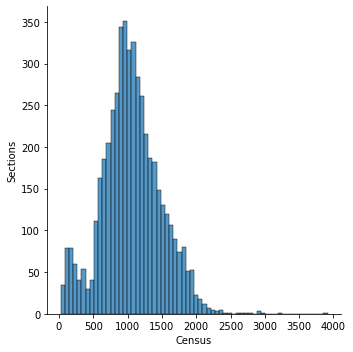

In [97]:
splot = sns.displot(df_elec_geo, x="Cens electoral")
splot.set_axis_labels('Census', 'Sections')
splot.savefig("census_by_sections.png")
splot

Let's consider how the size of the census affeect the turn-out.

<AxesSubplot:xlabel='Census', ylabel='Turnout'>

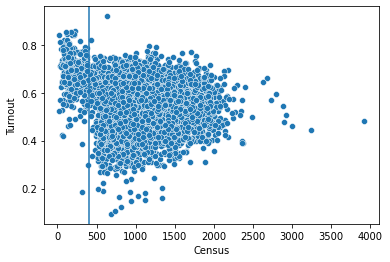

In [98]:
splot = sns.scatterplot(data = df_elec_geo, x="Cens electoral", y = "Turnout")
splot.axvline(400)
plt.xlabel("Census")
plt.savefig("census_vs_turn_out_by_sections.png")
splot

We can observe that districts with small census have high turnout in general. The vertical line separates the sections with less than $400$ names in the census. These also tend to be districts in municipalities of very low population density, which means that we can get very little or no data at all from Foursquare about them.

Since the small sections contribute little to the total size of the population, we will concentrate only on the districts with at least $400$ citizens in their census.  

In [99]:
indexRows = df_elec_geo[ df_elec_geo['Cens electoral'] < 400 ].index
df_elec_geo_big = df_elec_geo.drop(indexRows)
df_elec_geo_big.reset_index(inplace=True)
df_elec_geo_big.shape

(4643, 12)

## Getting data about business near the different election locations

We will get this data about our $4643$ locations from Foursquare. (There are 4 sections fewer because we originally used the geographic data from 2016 and were missing the coordinates of 4 more sections.)

In [50]:
import json
import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Next, we define the foursquare credentials.

In [51]:
CLIENT_ID = 'CLZBMC0VEORLF403O4SUZRGVL5UXY3NW2K5JTI5Z31S25TJD' # your Foursquare ID
CLIENT_SECRET = 'AFNO4GTZARJIFNJOHGQQ1LOGS0ZIRYQZI4SXHYWXUL50VBNB' # your Foursquare Secret
ACCESS_TOKEN = 'SA2ZIHSGQ5DQAYJA3N1F2XYEBZLA4YY0TF1G5BEDWHAACQZN' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 200 # A default Foursquare API limit value
RADIUS = 5000

In [52]:
# function that extracts the category of the venue

def get_category_from_list(categories_list):
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    return get_category_from_list(categories_list)

We need a formula for the radius that should be queried at Foursquare depending on the density of the municipality.

In [53]:
small_density = 10  # people per km^2
large_density = 20000 # density of Barcelona
def radius_choice(d):
    return 500+10000*np.sqrt(1.0/d)

print (radius_choice(small_density), radius_choice(large_density))

3662.2776601683795 570.7106781186548


In [59]:
def getNearbyVenues(venues_list, nom_municipi, districte, section, densitat, latitudes, longitudes):
    
    for name, district, section, density, lat, lng in zip(nom_municipi, districte, section, densitat, latitudes, longitudes):
        radius = radius_choice(density)
        print(name, district, section)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&browse=checkin'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            district,
            section,
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            get_category_from_list(v['categories'])) for v in results])


NOTE: To get the data from the elec_venues_sec.csv file instead of by querying Foursquare skip the next 3 steps.

In [60]:
venues_list = []

getNearbyVenues(venues_list,
                              nom_municipi=df_elec_geo_big['Nom municipi'],
                              districte = df_elec_geo_big['Districte'],
                              section = df_elec_geo_big['Secció'],
                              densitat = df_elec_geo_big['Densitat'],
                              latitudes=df_elec_geo_big['ycoord'],
                              longitudes=df_elec_geo_big['xcoord'])

elec_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
elec_venues.columns = ['Nom municipi', 
                  'Districte', 'Secció',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    



ABRERA 1 1
ABRERA 1 2
ABRERA 1 3
ABRERA 1 4
ABRERA 1 5
ABRERA 1 7
ABRERA 1 8
AGRAMUNT 1 1
AGRAMUNT 1 2
AGRAMUNT 1 3
AGRAMUNT 1 4
AGULLANA 1 1
AIGUAFREDA 1 1
AIGUAMÚRCIA 1 1
AIGUAVIVA 1 1
AITONA 1 1
AITONA 1 2
ELS ALAMÚS 1 1
ALBATÀRREC 1 1
ALBESA 1 1
L'ALBI 1 1
ALBINYANA 1 1
ALBONS 1 1
ALCANAR 1 1
ALCANAR 1 2
ALCANAR 1 3
ALCANAR 1 4
ALCANAR 2 1
ALCANAR 2 2
ALCARRÀS 1 1
ALCARRÀS 1 2
ALCARRÀS 1 3
ALCARRÀS 1 4
ALCOLETGE 1 1
ALCOLETGE 1 2
ALCOVER 1 1
ALCOVER 2 1
L'ALDEA 1 1
L'ALDEA 1 2
ALDOVER 1 1
L'ALEIXAR 1 1
ALELLA 1 1
ALELLA 1 2
ALELLA 1 3
ALELLA 1 4
ALFARRÀS 1 1
ALFARRÀS 1 2
ALFORJA 1 1
ALGUAIRE 1 1
ALGUAIRE 1 2
ALMACELLES 1 1
ALMACELLES 1 2
ALMACELLES 2 1
ALMACELLES 2 2
ALMENAR 1 1
ALMENAR 2 1
ALMENAR 2 2
ALMOSTER 1 1
ALP 1 1
ALPICAT 1 1
ALPICAT 1 2
ALPICAT 1 3
ALTAFULLA 1 1
ALTAFULLA 1 2
ALTAFULLA 1 3
AMER 1 1
L'AMETLLA DE MAR 1 1
L'AMETLLA DE MAR 1 2
L'AMETLLA DE MAR 1 3
L'AMETLLA DEL VALLÈS 1 1
L'AMETLLA DEL VALLÈS 1 2
L'AMETLLA DEL VALLÈS 1 3
L'AMETLLA DEL VALLÈS 1 4
L'AMETLLA DEL

BARCELONA 2 158
BARCELONA 2 159
BARCELONA 2 160
BARCELONA 2 161
BARCELONA 2 162
BARCELONA 2 163
BARCELONA 2 164
BARCELONA 2 165
BARCELONA 2 166
BARCELONA 2 167
BARCELONA 2 168
BARCELONA 2 169
BARCELONA 2 170
BARCELONA 2 171
BARCELONA 2 172
BARCELONA 2 173
BARCELONA 3 1
BARCELONA 3 2
BARCELONA 3 3
BARCELONA 3 4
BARCELONA 3 5
BARCELONA 3 6
BARCELONA 3 7
BARCELONA 3 8
BARCELONA 3 9
BARCELONA 3 10
BARCELONA 3 11
BARCELONA 3 12
BARCELONA 3 13
BARCELONA 3 14
BARCELONA 3 15
BARCELONA 3 16
BARCELONA 3 17
BARCELONA 3 18
BARCELONA 3 19
BARCELONA 3 20
BARCELONA 3 21
BARCELONA 3 22
BARCELONA 3 23
BARCELONA 3 24
BARCELONA 3 25
BARCELONA 3 26
BARCELONA 3 27
BARCELONA 3 28
BARCELONA 3 29
BARCELONA 3 30
BARCELONA 3 31
BARCELONA 3 32
BARCELONA 3 33
BARCELONA 3 34
BARCELONA 3 35
BARCELONA 3 36
BARCELONA 3 37
BARCELONA 3 38
BARCELONA 3 39
BARCELONA 3 40
BARCELONA 3 41
BARCELONA 3 42
BARCELONA 3 43
BARCELONA 3 44
BARCELONA 3 45
BARCELONA 3 46
BARCELONA 3 47
BARCELONA 3 48
BARCELONA 3 49
BARCELONA 3 50
BAR

BARCELONA 8 49
BARCELONA 8 50
BARCELONA 8 51
BARCELONA 8 52
BARCELONA 8 53
BARCELONA 8 54
BARCELONA 8 55
BARCELONA 8 56
BARCELONA 8 57
BARCELONA 8 58
BARCELONA 8 59
BARCELONA 8 60
BARCELONA 8 61
BARCELONA 8 62
BARCELONA 8 63
BARCELONA 8 64
BARCELONA 8 65
BARCELONA 8 66
BARCELONA 8 67
BARCELONA 8 68
BARCELONA 8 69
BARCELONA 8 70
BARCELONA 8 71
BARCELONA 8 72
BARCELONA 8 73
BARCELONA 8 74
BARCELONA 8 75
BARCELONA 8 76
BARCELONA 8 77
BARCELONA 8 78
BARCELONA 8 79
BARCELONA 8 80
BARCELONA 8 81
BARCELONA 8 82
BARCELONA 8 83
BARCELONA 8 84
BARCELONA 8 85
BARCELONA 8 86
BARCELONA 8 87
BARCELONA 8 88
BARCELONA 8 89
BARCELONA 8 90
BARCELONA 8 91
BARCELONA 8 92
BARCELONA 8 93
BARCELONA 8 94
BARCELONA 8 95
BARCELONA 8 96
BARCELONA 8 97
BARCELONA 8 98
BARCELONA 8 99
BARCELONA 8 100
BARCELONA 8 101
BARCELONA 8 102
BARCELONA 8 103
BARCELONA 8 104
BARCELONA 8 105
BARCELONA 8 106
BARCELONA 8 107
BARCELONA 8 108
BARCELONA 8 109
BARCELONA 8 110
BARCELONA 8 111
BARCELONA 8 112
BARCELONA 8 113
BARCELONA 8

CASTELLAR DEL VALLÈS 1 7
CASTELLAR DEL VALLÈS 1 8
CASTELLAR DEL VALLÈS 1 9
CASTELLAR DEL VALLÈS 1 10
CASTELLAR DEL VALLÈS 1 11
CASTELLAR DEL VALLÈS 1 12
CASTELLAR DEL VALLÈS 1 13
CASTELLAR DEL VALLÈS 1 14
CASTELLBELL I EL VILAR 1 1
CASTELLBELL I EL VILAR 1 2
CASTELLBISBAL 1 1
CASTELLBISBAL 1 2
CASTELLBISBAL 1 3
CASTELLBISBAL 1 4
CASTELLBISBAL 1 5
CASTELLBISBAL 1 6
CASTELLCIR 1 1
CASTELLDANS 1 1
CASTELLDEFELS 1 1
CASTELLDEFELS 1 2
CASTELLDEFELS 1 3
CASTELLDEFELS 1 4
CASTELLDEFELS 1 5
CASTELLDEFELS 1 6
CASTELLDEFELS 1 7
CASTELLDEFELS 2 1
CASTELLDEFELS 2 2
CASTELLDEFELS 2 3
CASTELLDEFELS 2 4
CASTELLDEFELS 2 5
CASTELLDEFELS 2 6
CASTELLDEFELS 3 1
CASTELLDEFELS 3 2
CASTELLDEFELS 3 3
CASTELLDEFELS 3 4
CASTELLDEFELS 3 5
CASTELLDEFELS 4 1
CASTELLDEFELS 4 2
CASTELLDEFELS 4 3
CASTELLDEFELS 4 4
CASTELLDEFELS 5 1
CASTELLDEFELS 5 2
CASTELLDEFELS 5 3
CASTELLDEFELS 5 4
CASTELLET I LA GORNAL 1 1
CASTELLFOLLIT DE LA ROCA 1 1
CASTELLGALÍ 1 1
CASTELLNOU DE BAGES 1 1
CASTELLNOU DE SEANA 1 1
CASTELLOLÍ 1 1


GRANOLLERS 1 1
GRANOLLERS 1 3
GRANOLLERS 1 4
GRANOLLERS 1 5
GRANOLLERS 1 6
GRANOLLERS 1 9
GRANOLLERS 1 10
GRANOLLERS 1 11
GRANOLLERS 2 1
GRANOLLERS 2 2
GRANOLLERS 2 3
GRANOLLERS 2 4
GRANOLLERS 2 5
GRANOLLERS 2 6
GRANOLLERS 2 7
GRANOLLERS 3 1
GRANOLLERS 3 2
GRANOLLERS 3 3
GRANOLLERS 3 4
GRANOLLERS 3 5
GRANOLLERS 3 6
GRANOLLERS 3 7
GRANOLLERS 3 8
GRANOLLERS 3 9
GRANOLLERS 3 10
GRANOLLERS 4 1
GRANOLLERS 4 2
GRANOLLERS 4 3
GRANOLLERS 4 4
GRANOLLERS 4 6
GRANOLLERS 4 7
GRANOLLERS 4 8
GRANOLLERS 4 9
GRANOLLERS 4 10
GRANOLLERS 4 11
GUALBA 1 1
GUARDIOLA DE BERGUEDÀ 1 1
GUILS DE CERDANYA 1 1
GUISSONA 1 1
GUISSONA 1 2
GUISSONA 1 3
GURB 1 1
HORTA DE SANT JOAN 1 1
L'HOSPITALET DE LLOBREGAT 1 1
L'HOSPITALET DE LLOBREGAT 1 2
L'HOSPITALET DE LLOBREGAT 1 3
L'HOSPITALET DE LLOBREGAT 1 4
L'HOSPITALET DE LLOBREGAT 1 5
L'HOSPITALET DE LLOBREGAT 1 6
L'HOSPITALET DE LLOBREGAT 1 7
L'HOSPITALET DE LLOBREGAT 1 8
L'HOSPITALET DE LLOBREGAT 1 9
L'HOSPITALET DE LLOBREGAT 1 10
L'HOSPITALET DE LLOBREGAT 1 11
L'HOSPIT

LLEIDA 7 2
LLEIDA 7 3
LLEIDA 7 4
LLEIDA 7 5
LLEIDA 7 6
LLEIDA 7 7
LLEIDA 8 1
LLEIDA 8 2
LLEIDA 8 3
LLEIDA 9 1
LLEIDA 9 2
LLERS 1 1
LLINARS DEL VALLÈS 1 1
LLINARS DEL VALLÈS 1 2
LLINARS DEL VALLÈS 2 1
LLINARS DEL VALLÈS 2 2
LLINARS DEL VALLÈS 2 3
LLINARS DEL VALLÈS 2 4
LLIÇÀ D'AMUNT 1 1
LLIÇÀ D'AMUNT 1 2
LLIÇÀ D'AMUNT 1 3
LLIÇÀ D'AMUNT 1 4
LLIÇÀ D'AMUNT 1 5
LLIÇÀ D'AMUNT 1 6
LLIÇÀ D'AMUNT 1 7
LLIÇÀ D'AMUNT 1 8
LLIÇÀ D'AMUNT 1 9
LLIÇÀ D'AMUNT 1 10
LLIÇÀ DE VALL 1 1
LLIÇÀ DE VALL 1 2
LLIÇÀ DE VALL 1 3
LLIÇÀ DE VALL 1 4
LLORENÇ DEL PENEDÈS 1 1
LLORET DE MAR 1 1
LLORET DE MAR 1 2
LLORET DE MAR 1 3
LLORET DE MAR 2 1
LLORET DE MAR 2 2
LLORET DE MAR 2 3
LLORET DE MAR 3 1
LLORET DE MAR 3 2
LLORET DE MAR 3 3
LLORET DE MAR 3 4
LLORET DE MAR 4 1
LLORET DE MAR 4 2
LLORET DE MAR 4 3
LLORET DE MAR 4 4
LLÍVIA 1 1
MAIALS 1 1
MALGRAT DE MAR 1 1
MALGRAT DE MAR 1 2
MALGRAT DE MAR 1 3
MALGRAT DE MAR 1 4
MALGRAT DE MAR 1 5
MALGRAT DE MAR 1 6
MALGRAT DE MAR 2 1
MALGRAT DE MAR 2 2
MALGRAT DE MAR 2 3
MANLLEU 1

EL PLA DE SANTA MARIA 1 1
EL PLA DEL PENEDÈS 1 1
LES PLANES D'HOSTOLES 1 1
ELS PLANS DE SIÓ 1 1
EL POAL 1 1
LA POBLA DE CLARAMUNT 1 1
LA POBLA DE LILLET 1 1
LA POBLA DE MAFUMET 1 1
LA POBLA DE MAFUMET 1 2
LA POBLA DE MONTORNÈS 1 1
LA POBLA DE MONTORNÈS 1 2
LA POBLA DE SEGUR 1 1
LA POBLA DE SEGUR 1 2
POLINYÀ 1 1
POLINYÀ 1 2
POLINYÀ 1 3
POLINYÀ 1 4
EL PONT DE SUERT 1 1
EL PONT DE SUERT 1 2
EL PONT DE VILOMARA I ROCAFORT 1 1
PONTS 1 1
PONTS 1 2
PORQUERES 1 1
PORQUERES 1 2
PORQUERES 1 3
EL PORT DE LA SELVA 1 1
PORTBOU 1 1
PRADES 1 1
EL PRAT DE LLOBREGAT 1 1
EL PRAT DE LLOBREGAT 1 2
EL PRAT DE LLOBREGAT 1 3
EL PRAT DE LLOBREGAT 1 4
EL PRAT DE LLOBREGAT 1 5
EL PRAT DE LLOBREGAT 2 1
EL PRAT DE LLOBREGAT 2 2
EL PRAT DE LLOBREGAT 2 3
EL PRAT DE LLOBREGAT 2 4
EL PRAT DE LLOBREGAT 2 5
EL PRAT DE LLOBREGAT 2 6
EL PRAT DE LLOBREGAT 2 7
EL PRAT DE LLOBREGAT 3 1
EL PRAT DE LLOBREGAT 3 2
EL PRAT DE LLOBREGAT 3 3
EL PRAT DE LLOBREGAT 3 4
EL PRAT DE LLOBREGAT 3 5
EL PRAT DE LLOBREGAT 3 6
EL PRAT DE LLOB

SANT BOI DE LLOBREGAT 2 4
SANT BOI DE LLOBREGAT 2 5
SANT BOI DE LLOBREGAT 2 6
SANT BOI DE LLOBREGAT 2 7
SANT BOI DE LLOBREGAT 2 8
SANT BOI DE LLOBREGAT 2 9
SANT BOI DE LLOBREGAT 2 10
SANT BOI DE LLOBREGAT 2 11
SANT BOI DE LLOBREGAT 2 12
SANT BOI DE LLOBREGAT 2 13
SANT BOI DE LLOBREGAT 2 14
SANT BOI DE LLOBREGAT 2 15
SANT BOI DE LLOBREGAT 2 16
SANT BOI DE LLOBREGAT 2 17
SANT BOI DE LLOBREGAT 2 18
SANT BOI DE LLOBREGAT 2 19
SANT BOI DE LLOBREGAT 3 1
SANT BOI DE LLOBREGAT 3 2
SANT BOI DE LLOBREGAT 3 3
SANT BOI DE LLOBREGAT 3 4
SANT BOI DE LLOBREGAT 3 5
SANT BOI DE LLOBREGAT 3 6
SANT BOI DE LLOBREGAT 3 7
SANT BOI DE LLOBREGAT 3 8
SANT BOI DE LLOBREGAT 3 9
SANT BOI DE LLOBREGAT 4 1
SANT BOI DE LLOBREGAT 4 2
SANT BOI DE LLOBREGAT 4 3
SANT BOI DE LLOBREGAT 4 4
SANT BOI DE LLOBREGAT 4 5
SANT BOI DE LLOBREGAT 4 6
SANT BOI DE LLOBREGAT 4 7
SANT BOI DE LLOBREGAT 4 8
SANT BOI DE LLOBREGAT 4 9
SANT BOI DE LLOBREGAT 5 1
SANT BOI DE LLOBREGAT 5 2
SANT BOI DE LLOBREGAT 5 3
SANT BOI DE LLOBREGAT 6 1
SA

SANT VICENÇ DELS HORTS 1 7
SANT VICENÇ DELS HORTS 1 8
SANT VICENÇ DELS HORTS 1 9
SANT VICENÇ DELS HORTS 1 10
SANT VICENÇ DELS HORTS 1 11
SANT VICENÇ DELS HORTS 1 12
SANT VICENÇ DELS HORTS 2 1
SANT VICENÇ DELS HORTS 2 2
SANT VICENÇ DELS HORTS 2 3
SANT VICENÇ DELS HORTS 3 1
SANT VICENÇ DELS HORTS 3 2
SANT VICENÇ DELS HORTS 4 1
SANT VICENÇ DELS HORTS 4 2
SANT VICENÇ DELS HORTS 4 3
SANTA BÀRBARA 1 1
SANTA BÀRBARA 2 1
SANTA COLOMA DE CERVELLÓ 1 1
SANTA COLOMA DE CERVELLÓ 1 2
SANTA COLOMA DE CERVELLÓ 1 3
SANTA COLOMA DE CERVELLÓ 1 4
SANTA COLOMA DE CERVELLÓ 1 5
SANTA COLOMA DE FARNERS 1 1
SANTA COLOMA DE FARNERS 1 2
SANTA COLOMA DE FARNERS 1 3
SANTA COLOMA DE FARNERS 1 4
SANTA COLOMA DE FARNERS 1 5
SANTA COLOMA DE FARNERS 1 6
SANTA COLOMA DE GRAMENET 1 1
SANTA COLOMA DE GRAMENET 1 2
SANTA COLOMA DE GRAMENET 1 3
SANTA COLOMA DE GRAMENET 1 4
SANTA COLOMA DE GRAMENET 1 5
SANTA COLOMA DE GRAMENET 1 6
SANTA COLOMA DE GRAMENET 1 7
SANTA COLOMA DE GRAMENET 1 9
SANTA COLOMA DE GRAMENET 1 10
SANTA CO

TERRASSA 6 6
TERRASSA 6 8
TERRASSA 6 9
TERRASSA 6 10
TERRASSA 6 11
TERRASSA 6 12
TERRASSA 6 13
TERRASSA 6 14
TERRASSA 6 16
TERRASSA 6 18
TERRASSA 6 20
TERRASSA 6 23
TERRASSA 6 24
TERRASSA 6 25
TERRASSA 6 26
TERRASSA 6 27
TERRASSA 6 28
TERRASSA 6 29
TERRASSA 6 30
TERRASSA 6 31
TERRASSA 6 32
TERRASSA 6 33
TIANA 1 1
TIANA 1 2
TIANA 1 3
TIANA 1 4
TIANA 1 5
TIVENYS 1 1
TIVISSA 1 1
TONA 1 1
TONA 1 2
TONA 1 3
TONA 1 4
TORDERA 1 1
TORDERA 1 2
TORDERA 1 3
TORDERA 1 4
TORDERA 2 1
TORDERA 2 2
TORDERA 2 3
TORELLÓ 1 1
TORELLÓ 1 2
TORELLÓ 1 4
TORELLÓ 2 1
TORELLÓ 2 2
TORELLÓ 3 1
TORELLÓ 3 2
TORELLÓ 3 3
TORNABOUS 1 1
LA TORRE DE CABDELLA 1 1
LA TORRE DE CLARAMUNT 1 1
LA TORRE DE CLARAMUNT 1 2
LA TORRE DE L'ESPANYOL 1 1
TORREDEMBARRA 1 1
TORREDEMBARRA 1 2
TORREDEMBARRA 1 3
TORREDEMBARRA 1 4
TORREDEMBARRA 1 5
TORREDEMBARRA 1 6
TORREDEMBARRA 1 7
TORREDEMBARRA 1 8
TORREFARRERA 1 1
TORREFARRERA 1 2
TORREFETA I FLOREJACS 1 1
TORREGROSSA 1 1
TORRELAMEU 1 1
TORRELLES DE FOIX 1 1
TORRELLES DE LLOBREGAT 1 1
TOR

In [61]:
elec_venues

,Nom municipi,Districte,Secció,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABRERA,1,1,Chitango,41.507252,1.902131,Accessories Store
1,ABRERA,1,1,GENERAL DE GASOLINERAS SL,41.507524,1.903196,Gas Station
2,ABRERA,1,1,Urbanizacion las carpes,41.507654,1.901765,Mountain
3,ABRERA,1,1,Caprabo,41.507208,1.902957,Supermarket
4,ABRERA,1,1,Phone House,41.507080,1.902637,Mobile Phone Shop
...,...,...,...,...,...,...,...
526939,ÒRRIUS,1,1,Can Sagal,41.567945,2.339159,Restaurant
526940,ÒRRIUS,1,1,Spaanse Tafel 6,41.563503,2.372876,Other Great Outdoors
526941,ÒRRIUS,1,1,Garrinada,41.547991,2.390613,General Entertainment
526942,ÒRRIUS,1,1,Het Promi Kasteel,41.564057,2.373033,Hotel


In [62]:
elec_venues.to_csv("elec_venues_sec.csv", index=False)

In [48]:
elec_venues = pd.read_csv("elec_venues_sec.csv")

In [49]:
elec_venues.shape

(526944, 8)

We will remove venues that don't have a category.

In [50]:
elec_venues.dropna(subset=["Venue Category"], axis=0, inplace=True)
elec_venues.shape

(504424, 8)

Let's check how many different categories there are, and how many unique venues (a venue can appear in the list of more than one district). 

In [51]:
len(elec_venues['Venue Category'].unique())

698

Let's check also how many unique venues there are in the data. Some venues may appear repeatedly for neighboring sections.

In [52]:
elec_venues["Coord"] = elec_venues["Venue Latitude"].astype(str) + elec_venues["Venue Longitude"].astype(str)
len(elec_venues["Coord"].unique())

175354

This means that on average the same venue appears 3 times.

These are way too many categories to be useful, so we have to combine them.

In [53]:
elec_venues['Venue Category'].value_counts()[:25]

Restaurant                                  15720
Office                                      15659
Bar                                         15476
Salon / Barbershop                          12346
Bakery                                      11058
Café                                        10987
Bank                                        10022
Mediterranean Restaurant                     9088
Building                                     8808
Tapas Restaurant                             7527
Grocery Store                                7400
Spanish Restaurant                           7285
Other Great Outdoors                         6841
Coffee Shop                                  6651
Plaza                                        6350
Residential Building (Apartment / Condo)     6237
Gas Station                                  5787
Automotive Shop                              5625
General Entertainment                        5490
Factory                                      5466


In [54]:
def is_social_food(category):
    keywords = ["Restaurant", "Café", "Breakfast", "BBQ", "Cafe", "Salad",  "Noodle", "Soup", "Coffee Shop", 
                "Diner", "Steakhouse", "Buffet", "Food"]
    return any(f in category for f in keywords)

def is_fast_food(category):
    keywords = ["Sandwich", "Burger", "Pizza", "Deli", "Burrito", "Fried Chicken", "Food Court", "Food Truck",
               "Hot Dog", "Mac & Cheese", "Taco", "Food Stand", "Wings Joint"]
    return any(f in category for f in keywords)

def is_snack(category):
    keywords = ["Snack", "Ice Cream", "Pastry", "Dessert", "Creperie",
            "Bagel", "Tea", "Yogurt", "Dairy", "Smoothie", "Pie", "Candy", "Cupcake", "Pastelaria"]
    return any(f in category for f in keywords)


def is_groceries(category):
    keywords = ["Market", "Bakery", "Gourmet", "Butcher", "Fruit", 
            "Grocery", "Chocolate", "Supermarket", "Food & Drink", "Wine Shop"]
    return any(f in category for f in keywords)

def is_alcohol(category):
    keywords = ["Bar", "Pub", "Liquor", "Beer", "Brewery", "Gastropub", "Nightlife", "Strip Club", "Nightclub",
               "Lounge", "Bistro", "Club House", "Casino"]
    return any(f in category for f in keywords)
    
def is_outdoors(category):
    keywords = ["Outdoor", "Park", "Lake", "River", "Tree", "Playground", "Scenic", "Mountain", "Trail", 
                "Campground", "Beach", "Forest", "Garden", "Rest Area", "Bridge", "Fountain", "Well", "Waterfall",
               "Picnic", "Waterfront", "Bathing Area", "Volcano", "Island", "Cave", "Marina", "Nature",
               "Fishing", "Hill", "Camp", "Lighthouse", "Reservoir"]
    return any(f in category for f in keywords)

def is_animals(category):
    keywords = ["Aquarium", "Zoo", "Farm", "Stables", "Pet", "Animal", "Veterinarian", "Dog"]
    return any(f in category for f in keywords)

def is_sport(category):
    keywords = ["Gym", "Football", "Basketball", "Volleyball", "Tennis", "Stadium", "Field", "Sports", "Ski",
               "Rugby", "Golf", "Cricket", "Badminton", "Hockey", "Squash", "Rink", "Race", "Surf", 
                "Rock Climbing", "Yoga", "Rock Club", "Dive", "Track", "Pilates", "Bike"]
    return any(f in category for f in keywords)

def is_transport(category):
    keywords = ["Bus", "Transportation", "Rail", "Metro", "Tram", "Airport", "Boat", "Train", "Platform"]
    return any(f in category for f in keywords)

def is_education(category):
    keywords = ["School", "Daycare", "school", "College", "University", "Student", "Education"]
    return any(f in category for f in keywords)
    

def is_cultural(category):
    keywords = ["Castle", "Museum", "Gallery", "Historic", "Concert", "Cultural", "Theater", "Art", 
                "Opera", "Monument", "Monastery", "Exhibit", "Library", "Comedy Club", "Auditorium", 
                "Social Club", "theater", "Community Center", "Observatory", "Planetarium", "Laboratory",
               "Meeting Room", "Circus"]
    return any(f in category for f in keywords)

def is_auto(category):
    keywords = ["Auto", "Car"]
    return any(f in category for f in keywords)

def is_medical(category):
    keywords = ["Doctor", "Dentist", "Hospital", "Medical", "Emergency Room", "Rehab", "Therapist", 
                "Chiropractor", "Assisted Living", "Massage"]
    return any(f in category for f in keywords)

def is_building(category):
    keywords = ["Building", "Housing"]
    return any(f in category for f in keywords)

def is_office(category):
    keywords = ["Office", "Professional", "Coworking", "Startup", "Agency", "Financial", "Notary", "Lawyer",
               "Industrial", "IT", "Design", "Photography"]
    return any(f in category for f in keywords)

def is_retail(category):
    keywords = ["Shop", "Store", "Boutique", "store", "Mall", "Fair"]
    return any(f in category for f in keywords)

def is_hotel(category):
    keywords = ["Hotel", "Resort", "Hostel", "Boarding", "Vacation", "Spa", "Motel", "Sauna", "Bath", 
               "Hot Spring"]
    return any(f in category for f in keywords)

def is_dance(category):
    keywords = ["Dance", "Ballroom", "Music", "Salsa", "Jazz Club"]
    return any(f in category for f in keywords)

def is_plaza(category):
    keywords = ["Plaza"]
    return any(f in category for f in keywords)

def is_entertainment(category):
    keywords = ["Entertainment", "Pool Hall", "Escape Room", "Arcade", "Bowling Alley", "Play", 
                "Multiplex", "Recreation", "Gun Range"]
    return any(f in category for f in keywords)

def is_wine(category):
    keywords = ["Distillery", "Wine", "Vineyard"]
    return any(f in category for f in keywords)

def is_travel(category):
    keywords = ["Travel", "Tourist"]
    return any(f in category for f in keywords)

def is_administrative(category):
    keywords = ["City Hall", "Town Hall", "Courthouse", "Police", "Embassy"]
    return any(f in category for f in keywords)

def is_spiritual(category):
    keywords = ["Church", "Temple", "Shrine", "Spiritual", "Mosque", "Synagogue"]
    return any(f in category for f in keywords)

def is_esthetics(category):
    keywords = ["Nail", "Salon", "Tattoo", "Beauty", "Barbershop"]
    return any(f in category for f in keywords)


In [55]:
def summarize_category(category):
    if (is_social_food(category)): return "Restaurant"
    if (is_fast_food(category)): return "Fast Food"
    if (is_snack(category)): return "Snack"
    if (is_groceries(category)): return "Groceries"
    if (is_outdoors(category)): return "Outdoors"
    if (is_sport(category)): return "Sports"
    if (is_education(category)): return "Education"
    if (is_transport(category)): return "Transportation"
    if (is_cultural(category)): return "Culture Venue"
    if (is_auto(category)): return "Auto"
    if (is_medical(category)): return "Medical"
    if (is_building(category)): return "Building"
    if (is_office(category)): return "Office"
    if (is_esthetics(category)): return "Esthetics"
    if (is_retail(category)): return "Retail"
    if (is_hotel(category)): return "Hospitality"
    if (is_dance(category)): return "Dance Venue"
    if (is_plaza(category)): return "Plaza"
    if (is_entertainment(category)): return "Entertainment"
    if (is_wine(category)): return "Wine"
    if (is_travel(category)): return "Travel"
    if (is_administrative(category)): return "Administrative Building"
    if (is_spiritual(category)): return "Spiritual Place"
    if (is_animals(category)): return "Animals"
    if (is_alcohol(category)): return "Alcohol and Nightlife"
    else: return category
    

In [56]:
elec_venues["Summarized Category"] = elec_venues["Venue Category"].apply(summarize_category)
elec_venues

,Unnamed: 0,Nom municipi,Districte,Secció,Venue,Venue Latitude,Venue Longitude,Venue Category,Coord,Summarized Category
0,0,ABRERA,1,1,Chitango,41.507252,1.902131,Accessories Store,41.5072521.902131,Retail
1,1,ABRERA,1,1,GENERAL DE GASOLINERAS SL,41.507524,1.903196,Gas Station,41.507523994416451.903195577041119,Gas Station
2,2,ABRERA,1,1,Urbanizacion las carpes,41.507654,1.901765,Mountain,41.507654423314171.9017646710534943,Outdoors
3,3,ABRERA,1,1,Caprabo,41.507208,1.902957,Supermarket,41.5072078265337441.9029570894858745,Groceries
4,4,ABRERA,1,1,Phone House,41.507080,1.902637,Mobile Phone Shop,41.507081.9026365,Retail
...,...,...,...,...,...,...,...,...,...,...
526939,526939,ÒRRIUS,1,1,Can Sagal,41.567945,2.339159,Restaurant,41.5679452.339159,Restaurant
526940,526940,ÒRRIUS,1,1,Spaanse Tafel 6,41.563503,2.372876,Other Great Outdoors,41.5635032.372876,Outdoors
526941,526941,ÒRRIUS,1,1,Garrinada,41.547991,2.390613,General Entertainment,41.5479912.390613,Entertainment
526942,526942,ÒRRIUS,1,1,Het Promi Kasteel,41.564057,2.373033,Hotel,41.5640572.373033,Hospitality


Let's check how many categories are left.

In [57]:
len(elec_venues['Summarized Category'].unique())

113

In [58]:
from wordcloud import WordCloud

In [59]:
original_categories_wc = WordCloud(
    collocations=True,
    background_color='white',
    max_words=2000
)

# generate the word cloud
original_categories_wc.generate(elec_venues['Venue Category'].str.cat(sep=", "))

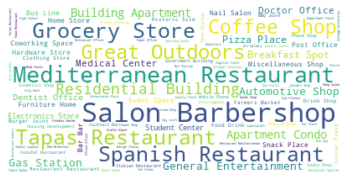

In [60]:
# display the word cloud
plt.imshow(original_categories_wc, interpolation='bilinear')
plt.axis('off')
plt.savefig("wc_orig_cat.png")
plt.show()

In [61]:
summarized_categories_wc = WordCloud(collocations=False,
    background_color='white',
    max_words=50
)

# generate the word cloud
summarized_categories_wc.generate(elec_venues['Summarized Category'].str.cat(sep = ", "))

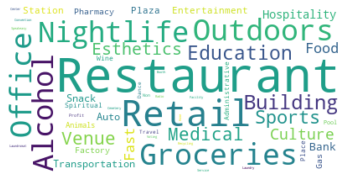

In [62]:
# display the word cloud
plt.imshow(summarized_categories_wc, interpolation='bilinear')
plt.axis('off')
plt.savefig("wc_summarized_cat.png")
plt.show()

In [63]:
elec_venues['Summarized Category'].value_counts()[:30]

Restaurant                 96366
Retail                     52024
Office                     31787
Groceries                  31278
Outdoors                   30973
Alcohol and Nightlife      29590
Education                  20909
Building                   19462
Sports                     19117
Medical                    17165
Esthetics                  16571
Culture Venue              14843
Fast Food                  13598
Hospitality                10818
Bank                       10022
Transportation              9112
Auto                        9042
Snack                       8341
Plaza                       6931
Entertainment               6740
Gas Station                 5787
Factory                     5466
Pharmacy                    5324
Animals                     4740
Spiritual Place             3734
Administrative Building     3316
Wine                        3299
Pool                        2822
Dance Venue                 2393
Travel                      2055
Name: Summ

In [64]:
elec_venues['Summarized Category'].value_counts()[30:40]

Non-Profit            1355
Laundry Service        795
Speakeasy              682
Cemetery               665
Radio Station          643
Convention Center      560
Voting Booth           487
Recycling Facility     401
Laundromat             368
Funeral Home           352
Name: Summarized Category, dtype: int64

We will keep just the top 30 categories.

In [65]:
top30_categories = elec_venues['Summarized Category'].value_counts()[0:30].keys()
top30_categories

Index(['Restaurant', 'Retail', 'Office', 'Groceries', 'Outdoors',
       'Alcohol and Nightlife', 'Education', 'Building', 'Sports', 'Medical',
       'Esthetics', 'Culture Venue', 'Fast Food', 'Hospitality', 'Bank',
       'Transportation', 'Auto', 'Snack', 'Plaza', 'Entertainment',
       'Gas Station', 'Factory', 'Pharmacy', 'Animals', 'Spiritual Place',
       'Administrative Building', 'Wine', 'Pool', 'Dance Venue', 'Travel'],
      dtype='object')

In [66]:
elec_venues["Top 30 Categories"] = elec_venues["Summarized Category"].apply(lambda cat: cat if cat in top30_categories else np.NaN)
elec_venues_top30 = elec_venues.dropna(subset = ["Top 30 Categories"], axis = 0)
elec_venues_top30.drop(['Top 30 Categories', "Venue Latitude", "Venue Longitude", "Venue Category", "Venue", "Coord"], axis = 1, inplace=True)
elec_venues_top30

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,Nom municipi,Districte,Secció,Summarized Category
0,0,ABRERA,1,1,Retail
1,1,ABRERA,1,1,Gas Station
2,2,ABRERA,1,1,Outdoors
3,3,ABRERA,1,1,Groceries
4,4,ABRERA,1,1,Retail
...,...,...,...,...,...
526939,526939,ÒRRIUS,1,1,Restaurant
526940,526940,ÒRRIUS,1,1,Outdoors
526941,526941,ÒRRIUS,1,1,Entertainment
526942,526942,ÒRRIUS,1,1,Hospitality


Next, we create the one-hot encoding of the category data.

In [67]:
# one hot encoding
venues_onehot = pd.get_dummies(elec_venues_top30[['Summarized Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Nom municipi'] = elec_venues_top30['Nom municipi'] 
venues_onehot['Districte'] = elec_venues_top30['Districte'] 
venues_onehot['Secció'] = elec_venues_top30['Secció']

# move neighborhood column to the first column
fixed_columns = list(venues_onehot.columns[-3:]) + list(venues_onehot.columns[:-3])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Nom municipi,Districte,Secció,Administrative Building,Alcohol and Nightlife,Animals,Auto,Bank,Building,Culture Venue,...,Plaza,Pool,Restaurant,Retail,Snack,Spiritual Place,Sports,Transportation,Travel,Wine
0,ABRERA,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,ABRERA,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABRERA,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABRERA,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABRERA,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
venues_onehot["Total"] = 1

In [69]:
venues_onehot_grouped = venues_onehot.groupby(['Nom municipi', 'Districte', 'Secció']).sum()
venues_onehot_grouped

Administrative Building  Alcohol and Nightlife  \
Nom municipi Districte Secció                                                   
ABRERA       1         1                             0                      4   
                       2                             0                      4   
                       3                             0                      3   
                       4                             0                      7   
                       5                             0                      4   
...                                                ...                    ...   
XERTA        1         1                             1                     15   
ÀGER         1         1                             0                      2   
ÒDENA        1         1                             1                      5   
                       2                             0                      4   
ÒRRIUS       1         1                             1                      1   

                               Animals  Auto  Bank  Building  Culture Venue  \
Nom municipi Districte Secció                                                 
ABRERA       1         1             0     7     2         4              2   
                       2             0     2     1         4              5   
                       3             0     3     2         3              3   
                       4             0     5     1         5              3   
                       5             0     2     2         4              3   
...                                ...   ...   ...       ...            ...   
XERTA        1         1             0     1     0         2              5   
ÀGER         1         1             0     0     0         2              5   
ÒDENA        1         1             4     2     1         2              4   
                       2             2     5     3         5              4   
ÒRRIUS       1         1             5     0     1         3              2   

                               Dance Venue  Education  Entertainment  ...  \
Nom municipi Districte Secció                                         ...   
ABRERA       1         1                 0          1              3  ...   
                       2                 1          6              4  ...   
                       3                 0          2              3  ...   
                       4                 0          1              3  ...   
                       5                 1          5              4  ...   
...                                    ...        ...            ...  ...   
XERTA        1         1                 0          4              3  ...   
ÀGER         1         1                 1          2              0  ...   
ÒDENA        1         1                 0          3              2  ...   
                       2                 0          3              2  ...   
ÒRRIUS       1         1                 0          3              2  ...   

                               Pool  Restaurant  Retail  Snack  \
Nom municipi Districte Secció                                    
ABRERA       1         1          0          23      19      4   
                       2          2          22      12      4   
                       3          2          23      19      5   
                       4          0          20       7      1   
                       5          2          21      13      4   
...                             ...         ...     ...    ...   
XERTA        1         1          2          24       3      0   
ÀGER         1         1          2          15       2      0   
ÒDENA        1         1          2          19       8      2   
                       2          0          13      18      1   
ÒRRIUS       1         1          1          27       6      1   

                               Spiritual Place  Sports  Transportation  \
Nom municipi D

In [70]:
venue_freq = venues_onehot.groupby(['Nom municipi', 'Districte', 'Secció']).mean()
venue_freq["Total"] = venues_onehot_grouped["Total"]
venue_freq

Administrative Building  Alcohol and Nightlife  \
Nom municipi Districte Secció                                                   
ABRERA       1         1                      0.000000               0.034483   
                       2                      0.000000               0.036697   
                       3                      0.000000               0.026087   
                       4                      0.000000               0.065421   
                       5                      0.000000               0.036697   
...                                                ...                    ...   
XERTA        1         1                      0.008475               0.127119   
ÀGER         1         1                      0.000000               0.032787   
ÒDENA        1         1                      0.009091               0.045455   
                       2                      0.000000               0.036697   
ÒRRIUS       1         1                      0.008772               0.008772   

                                Animals      Auto      Bank  Building  \
Nom municipi Districte Secció                                           
ABRERA       1         1       0.000000  0.060345  0.017241  0.034483   
                       2       0.000000  0.018349  0.009174  0.036697   
                       3       0.000000  0.026087  0.017391  0.026087   
                       4       0.000000  0.046729  0.009346  0.046729   
                       5       0.000000  0.018349  0.018349  0.036697   
...                                 ...       ...       ...       ...   
XERTA        1         1       0.000000  0.008475  0.000000  0.016949   
ÀGER         1         1       0.000000  0.000000  0.000000  0.032787   
ÒDENA        1         1       0.036364  0.018182  0.009091  0.018182   
                       2       0.018349  0.045872  0.027523  0.045872   
ÒRRIUS       1         1       0.043860  0.000000  0.008772  0.026316   

                               Culture Venue  Dance Venue  Education  \
Nom municipi Districte Secció                                          
ABRERA       1         1            0.017241     0.000000   0.008621   
                       2            0.045872     0.009174   0.055046   
                       3            0.026087     0.000000   0.017391   
                       4            0.028037     0.000000   0.009346   
                       5            0.027523     0.009174   0.045872   
...                                      ...          ...        ...   
XERTA        1         1            0.042373     0.000000   0.033898   
ÀGER         1         1            0.081967     0.016393   0.032787   
ÒDENA        1         1            0.036364     0.000000   0.027273   
                       2            0.036697     0.000000   0.027523   
ÒRRIUS       1         1            0.017544     0.000000   0.026316   

                               Entertainment  ...      Pool  Restaurant  \
Nom municipi Districte Secció                 ...                         
ABRERA       1         1            0.025862  ...  0.000000    0.198276   
                       2            0.036697  ...  0.018349    0.201835   
                       3            0.026087  ...  0.017391    0.200000   
                       4            0.028037  ...  0.000000    0.186916   
                       5            0.036697  ...  0.018349    0.192661   
...                                      ...  ...       ...         ...   
XERTA        1         1            0.025424  ...  0.016949    0.203390   
ÀGER         1         1            0.000000  ...  0.032787    0.245902   
ÒDENA        1         1            0.018182  ...  0.018182    0.172727   
                       2            0.018349  ...  0.000000    0.119266   
ÒRRIUS       1         1            0.017544  ...  0.008772    0.236842   

                                 Retail     Snack  Spiritual Place    Sports  \
Nom municipi Districte Secció     

Finally we merge the data about venue categories with the election data.

In [71]:
#df_elec_venue_nums = pd.merge(left=df_elec_geo, right=venue_freq, on = ["Nom municipi", "Districte", "Secció"], how = "left")
df_elec_venue_nums = pd.merge(left=df_elec_geo, right=venues_onehot_grouped, on = ["Nom municipi", "Districte", "Secció"], how = "left")
df_elec_venue_nums.dropna(subset=["Total"], axis = 0, inplace=True)
df_elec_venue_nums

,Nom municipi,Districte,Secció,Cens electoral,Votants,xcoord,ycoord,MUNICIPI,area,Turnout,...,Pool,Restaurant,Retail,Snack,Spiritual Place,Sports,Transportation,Travel,Wine,Total
1,ABRERA,1,1,1143,623,408669.933394,4.596033e+06,80018.0,9.138688e+05,0.545057,...,0.0,23.0,19.0,4.0,1.0,0.0,0.0,0.0,0.0,116.0
2,ABRERA,1,2,1309,666,408290.793124,4.597078e+06,80018.0,1.268576e+05,0.508785,...,2.0,22.0,12.0,4.0,1.0,4.0,1.0,0.0,1.0,109.0
3,ABRERA,1,3,615,387,409290.726611,4.596322e+06,80018.0,2.567460e+06,0.629268,...,2.0,23.0,19.0,5.0,1.0,5.0,1.0,0.0,0.0,115.0
4,ABRERA,1,4,1421,830,406672.964511,4.596513e+06,80018.0,6.637347e+06,0.584096,...,0.0,20.0,7.0,1.0,0.0,3.0,1.0,0.0,1.0,107.0
5,ABRERA,1,5,1389,673,408190.174914,4.596794e+06,80018.0,1.012300e+05,0.484521,...,2.0,21.0,13.0,4.0,1.0,1.0,1.0,0.0,1.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,XERTA,1,1,917,521,286353.478480,4.531038e+06,430521.0,3.242052e+07,0.568157,...,2.0,24.0,3.0,0.0,3.0,2.0,0.0,1.0,0.0,118.0
4993,ÀGER,1,1,457,301,312712.258390,4.652311e+06,250024.0,1.602026e+08,0.658643,...,2.0,15.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,61.0
4994,ÒDENA,1,1,1771,1006,385821.913897,4.608734e+06,81430.0,4.716710e+07,0.568041,...,2.0,19.0,8.0,2.0,0.0,9.0,0.0,0.0,0.0,110.0
4995,ÒDENA,1,2,978,500,387520.240540,4.604520e+06,81430.0,4.925480e+06,0.511247,...,0.0,13.0,18.0,1.0,0.0,7.0,5.0,0.0,0.0,109.0
